<a href="https://www.kaggle.com/code/ranjeetkumbhar/ml-assignment-7-te-it-sppu?scriptVersionId=110810045" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# !pip install keras tensorflow -U

In [2]:
import math
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [3]:
df = np.loadtxt('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv', delimiter=',')

In [4]:
df

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [5]:
df.shape

(768, 9)

In [6]:
x = df[:,:8]
y = df[:,8]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)

X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [8]:
print(f"x train shape{X_train.shape}")
print(f"y train shape{y_train.shape}")
print(f"x test shape{X_test.shape}")
print(f"y test shape{y_test.shape}")
print(f"x val shape{X_val.shape}")
print(f"y val shape{y_val.shape}")

x train shape(614, 8)
y train shape(614,)
x test shape(77, 8)
y test shape(77,)
x val shape(77, 8)
y val shape(77,)


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [10]:
from collections import Counter
Counter(y)

Counter({1.0: 268, 0.0: 500})

In [11]:
import seaborn as sns

In [12]:
# sns.countplot(y)

In [13]:
from tensorflow.keras.models import Sequential

In [14]:
model = Sequential([

tf.keras.layers.InputLayer(8,),
Dense(50,activation='relu'),
    
Dense(50,activation='relu'),
Dense(50,activation='relu'),
Dense(50,activation='relu'),
    
Dense(1,activation='sigmoid')
])


2022-11-12 19:23:28.405404: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                450       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 8,151
Trainable params: 8,151
Non-trainable params: 0
_________________________________________________________________


In [16]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [17]:
history = model.fit(x=x,y=y,epochs=300, batch_size=50,validation_data=(X_val,y_val))

2022-11-12 19:23:28.666100: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/300
16/16 [==============================] - 1s 20ms/step - loss: 4.3687 - accuracy: 0.6484 - val_loss: 0.7085 - val_accuracy: 0.3766
Epoch 2/300
16/16 [==============================] - 0s 5ms/step - loss: 1.8559 - accuracy: 0.5820 - val_loss: 0.7094 - val_accuracy: 0.4156
Epoch 3/300
16/16 [==============================] - 0s 5ms/step - loss: 0.9362 - accuracy: 0.4987 - val_loss: 0.7087 - val_accuracy: 0.4286
Epoch 4/300
16/16 [==============================] - 0s 5ms/step - loss: 0.7237 - accuracy: 0.6276 - val_loss: 0.7089 - val_accuracy: 0.4286
Epoch 5/300
16/16 [==============================] - 0s 6ms/step - loss: 0.6846 - accuracy: 0.6341 - val_loss: 0.7092 - val_accuracy: 0.4156
Epoch 6/300
16/16 [==============================] - 0s 5ms/step - loss: 0.6645 - accuracy: 0.6406 - val_loss: 0.7088 - val_accuracy: 0.4156
Epoch 7/300
16/16 [==============================] - 0s 5ms/step - loss: 0.6514 - accuracy: 0.6471 - val_loss: 0.7083 - val_accuracy: 0.4026
Epoch 8/300


<AxesSubplot:>

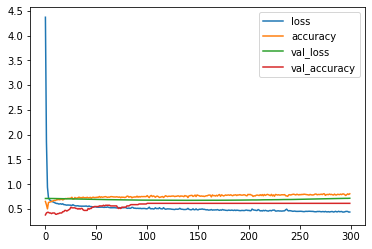

In [18]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [19]:
model.evaluate(x,y)

24/24 [==============================] - 0s 2ms/step - loss: 0.4277 - accuracy: 0.8099


[0.42774689197540283, 0.8098958134651184]

In [20]:
y_pred = model.predict(X_test)

In [21]:
y_pred

array([[0.29241186],
       [0.25659525],
       [0.2345556 ],
       [0.25635856],
       [0.2683779 ],
       [0.26534295],
       [0.24615443],
       [0.18696874],
       [0.23531413],
       [0.26499653],
       [0.25147843],
       [0.19693151],
       [0.2525043 ],
       [0.2924193 ],
       [0.24108097],
       [0.24926525],
       [0.24154398],
       [0.30027997],
       [0.26890767],
       [0.18842933],
       [0.27719277],
       [0.23296693],
       [0.25262323],
       [0.23384169],
       [0.26180875],
       [0.2531795 ],
       [0.21080497],
       [0.2493422 ],
       [0.27968198],
       [0.22347766],
       [0.2744137 ],
       [0.22154438],
       [0.24633941],
       [0.26000386],
       [0.30314064],
       [0.1814619 ],
       [0.17811224],
       [0.22696063],
       [0.23095623],
       [0.24577609],
       [0.21299466],
       [0.25943238],
       [0.26748422],
       [0.28173897],
       [0.21895227],
       [0.25581098],
       [0.2772973 ],
       [0.263

In [22]:
# !pip install ann_visualizer

In [23]:
# !pip install graphviz

In [24]:
# from ann_visualizer.visualize import ann_viz

# ann_viz(model, title="")

In [25]:
# !pip3 install keras
# !pip3 install ann_visualizer
# !pip install graphviz

In [26]:
# from ann_visualizer.visualize import ann_viz;

# ann_viz(model, title="My first neural network")

In [27]:
# python3 index.py